In [1]:
import os
os.chdir('..')

In [2]:
import numpy as np
import scipy as sp
import datajoint as dj

In [3]:
import matplotlib.pyplot as plt
from scipy import signal

from pipeline import lab, experiment, ephys, tracking
from pipeline.plot import behavior_plot

Connecting root@127.0.0.1:3306


In [4]:
session_keys = experiment.Session.fetch('KEY')

In [5]:
session_key = session_keys[0]

# Plot proportional 'correct' for one session

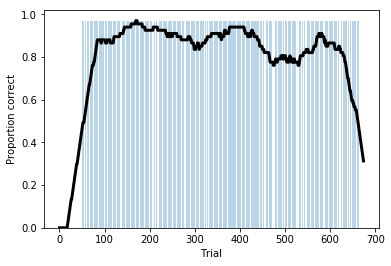

In [6]:
behavior_plot.plot_correct_proportion(session_key)

# Plot proportional 'correct' for one session, modulated by photostim

In [ ]:
photostims = experiment.Photostim * experiment.BrainLocation

In [ ]:
left_alm_photostim = (photostims & 'brain_area="ALM"' & 'hemisphere="left"').fetch1('KEY')
right_alm_photostim = (photostims & 'brain_area="ALM"' & 'hemisphere="right"').fetch1('KEY')
bi_alm_photostim = (photostims & 'brain_area="ALM"' & 'hemisphere="both"').fetch1('KEY')

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
fig.subplots_adjust(wspace=0.4)
behavior_plot.plot_photostim_effect(session_key, left_alm_photostim, axis=axs[0])
behavior_plot.plot_photostim_effect(session_key, right_alm_photostim, axis=axs[1])
behavior_plot.plot_photostim_effect(session_key, bi_alm_photostim, axis=axs[2])

# Plot movement tracking with spiking overlay

In [11]:
units = (ephys.Unit & session_key & 'unit_quality = "good"').fetch('KEY')

In [16]:
unit_key = units[6]

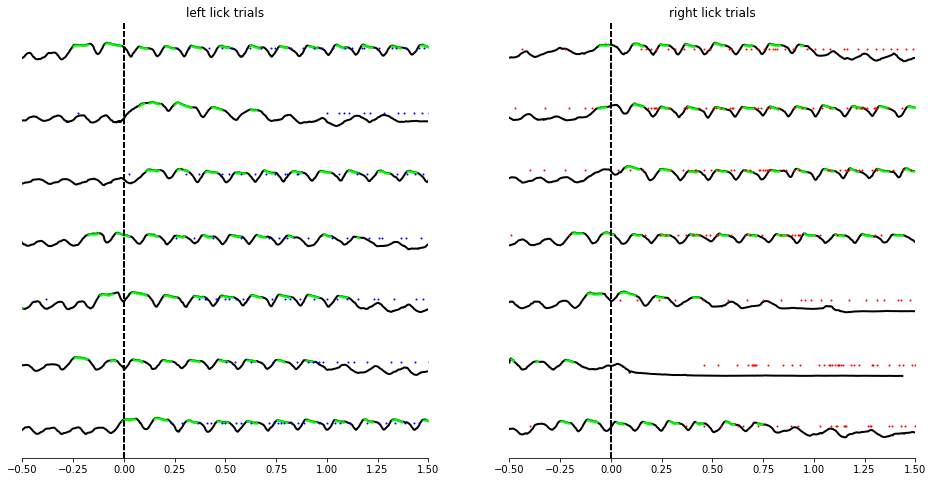

In [21]:
behavior_plot.plot_jaw_movement(session_key, unit_key, trial_limit=7)

# Plot single-trial jaw movement

In [32]:
tracking.Tracking * experiment.BehaviorTrial & session_key & experiment.ActionEvent

subject_id institution 6 digit animal ID,session session number,trial trial number,tracking_device device type/function,tracking_samples number of events,task task type,task_protocol task protocol,trial_instruction,early_lick,outcome
435884,1,51,Camera 0,1938,audio delay,1,left,no early,hit
435884,1,52,Camera 0,1978,audio delay,1,left,no early,hit
435884,1,53,Camera 0,2045,audio delay,1,left,early,hit
435884,1,58,Camera 0,1829,audio delay,1,left,no early,hit
435884,1,60,Camera 0,2308,audio delay,1,right,no early,miss
435884,1,62,Camera 0,2028,audio delay,1,left,no early,hit
435884,1,67,Camera 0,2095,audio delay,1,left,no early,hit


In [33]:
trials = (tracking.Tracking * experiment.BehaviorTrial & session_key & experiment.ActionEvent).fetch('KEY')

In [34]:
trial_key = trials[3]

In [35]:
trk = (tracking.Tracking.JawTracking * tracking.Tracking.TongueTracking
       * experiment.BehaviorTrial & trial_key & experiment.ActionEvent)

In [36]:
trk

subject_id institution 6 digit animal ID,session session number,trial trial number,tracking_device device type/function,jaw_x jaw x location (px),jaw_y jaw y location (px),jaw_likelihood jaw location likelyhood,tongue_x tongue x location (px),tongue_y tongue y location (px),tongue_likelihood tongue location likelyhood,task task type,task_protocol task protocol,trial_instruction,early_lick,outcome
435884,1,58,Camera 0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,audio delay,1,left,no early,hit


In [37]:
tracking_fs = float((tracking.TrackingDevice & tracking.Tracking & trial_key).fetch1('sampling_rate'))
jaw = trk.fetch1('jaw_y')

In [38]:
jaw

array([389.66133499, 389.80885601, 389.77109909, ..., 388.02548695,
       388.01616478, 387.78314734])

======================================================================================

In [20]:
importlib.reload(behavior_plot)

<module 'pipeline.plot.behavior_plot' from 'C:\\Users\\thinh\\Documents\\TN-Vathes\\MAP\\map-ephys\\pipeline\\plot\\behavior_plot.py'>